#Step 1: Import Libraries

In [456]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

#Step 2: Load and Clean the Dataset

In [457]:
#Load dataset
df = pd.read_csv("job_dataset.csv")

In [458]:
#Clean extra whitespace and newline characters from descriptions
df['Job Description'] = df['Job Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [459]:
#Preview the data
df.head()

,Job Title,Company Name,Job Description,Location,Job Type,Salary Range,Experience Level,Skills Required,Industry,Posted Date,Employment Mode
0,Mobile App Developer,"Rodriguez, Figueroa and Sanchez",We are seeking a entry level Mobile App Develo...,"Lake Curtis, Saint Vincent and the Grenadines",Full-time,$84k - $96k,Entry,"SQL, Docker, UI Design, JavaScript",Manufacturing,4/12/2025,Remote
1,Cybersecurity Analyst,Garza Inc,We are seeking a entry level Cybersecurity Ana...,"North Jefferyhaven, Netherlands Antilles",Internship,$84k - $117k,Entry,"SQL, Python, NoSQL, Node.js",Technology,2/21/2025,On-site
2,DevOps Engineer,"Gonzalez, Santos and Gardner",We are seeking a senior level DevOps Engineer ...,"South Bridget, Sudan",Internship,$63k - $139k,Senior,"Agile, Data Analysis, Docker, React",Healthcare,2/19/2025,On-site
3,Backend Developer,Wolfe LLC,We are seeking a entry level Backend Developer...,"Ericmouth, Bosnia and Herzegovina",Full-time,$79k - $125k,Entry,"UI Design, NoSQL, Security, Python, TypeScript",Retail,2/28/2025,On-site
4,Data Scientist,Davis-Abbott,We are seeking a entry level Data Scientist to...,"Lindsaymouth, Martinique",Internship,$68k - $96k,Entry,"AWS, React, Python, Data Analysis, Node.js",Education,3/3/2025,Remote


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         142 non-null    object
 1   Company Name      142 non-null    object
 2   Job Description   142 non-null    object
 3   Location          142 non-null    object
 4   Job Type          142 non-null    object
 5   Salary Range      142 non-null    object
 6   Experience Level  142 non-null    object
 7   Skills Required   142 non-null    object
 8   Industry          142 non-null    object
 9   Posted Date       142 non-null    object
 10  Employment Mode   142 non-null    object
dtypes: object(11)
memory usage: 12.3+ KB


In [461]:
#a method for managing missing data
#tarihi olmayan icin bugunun tarihini atar, diger verilerde eksiklik varsa satiri siler
def deleteRowOfMissingData(df, labels):
    for label in labels:
        if label == "Posted Date":
                df.loc[df[label].isna(), label] = df[label].fillna(datetime.now().date().strftime('%m/%d/%Y'))
        else:
            df = df.dropna(subset=[label])
    
    return df 

In [462]:
#a method for get country of location
def getCountry(df,location):
    if location == "Location":
        for index in df[location].index:
            #print(index, df['Location'][index].split(', ')[-1])
            df.loc[index, 'Location'] = df['Location'][index].split(', ')[-1]
    return df

#Step 3: Visualize the Dataset

In [463]:
#a method for drawing a pie chart
def pieChartDraw(df, label, titleOfChart, size):

    label_counts = df[label].value_counts() 

    plt.figure(figsize = size ) 

    plt.pie(
        label_counts,
        labels = label_counts.index,
        autopct = '%1.1f%%', 
        startangle = 140 
    )

    plt.title(titleOfChart, fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
    plt.axis('equal')
    plt.show()

##PIE CHART FOR JOB TITLE

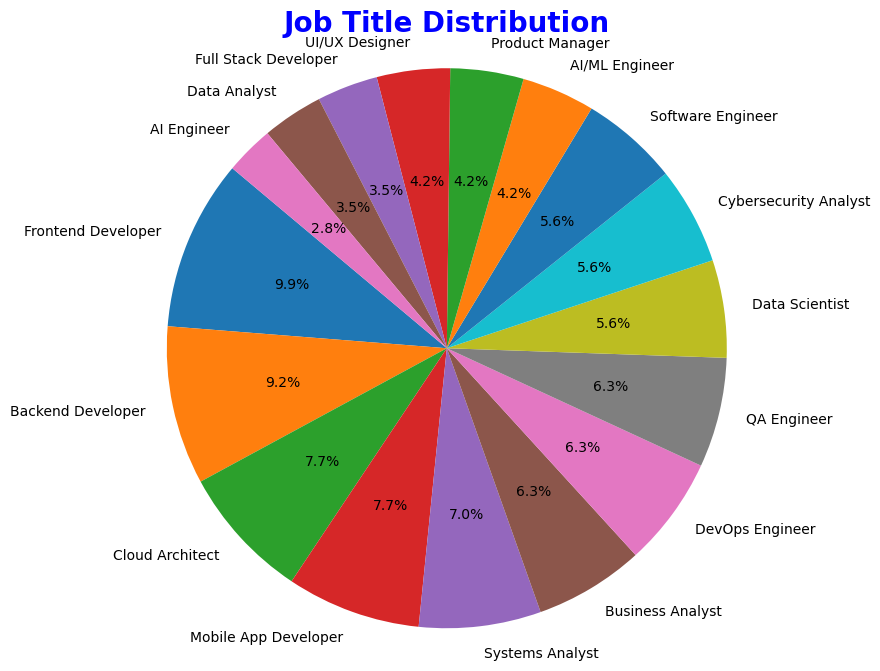

In [464]:
#pie chart for job title
#Mesleklerin tüm veri setindeki oranını görsel olarak temsil eder.
#Bu grafikler, mesleklerin göreceli boyutlarını hızlı bir şekilde anlamamıza yardımcı olabilir.

pieChartDraw(df, "Job Title", "Job Title Distribution", (10, 8))

In [465]:
#a method for drawing a count chart
def countXChartDraw(df, labelX, labelHue, titleOfChart, size):

    plt.figure(figsize = size)
    sns.countplot(data = df, x = labelX, hue= labelHue, order = df[labelX].value_counts().index)
    plt.title(titleOfChart, fontsize=20, fontweight='bold', color='blue', loc='center')
    plt.xlabel(labelX)
    plt.ylabel('Counts')
    plt.xticks(rotation = 80)
    plt.tight_layout()
    plt.show()

In [466]:
#a method for drawing a count chart
def countYChartDraw(df, labelY, labelHue, titleOfChart, size):

    plt.figure(figsize = size)
    sns.countplot(data = df, y = labelY, hue= labelHue, order = df[labelY].value_counts().index)
    plt.title(titleOfChart, fontsize=20, fontweight='bold', color='blue', loc='center')
    plt.xlabel('Counts')
    plt.ylabel(labelY)
    plt.tight_layout()
    plt.show()

##COUNT CHART FOR JOB TITLE

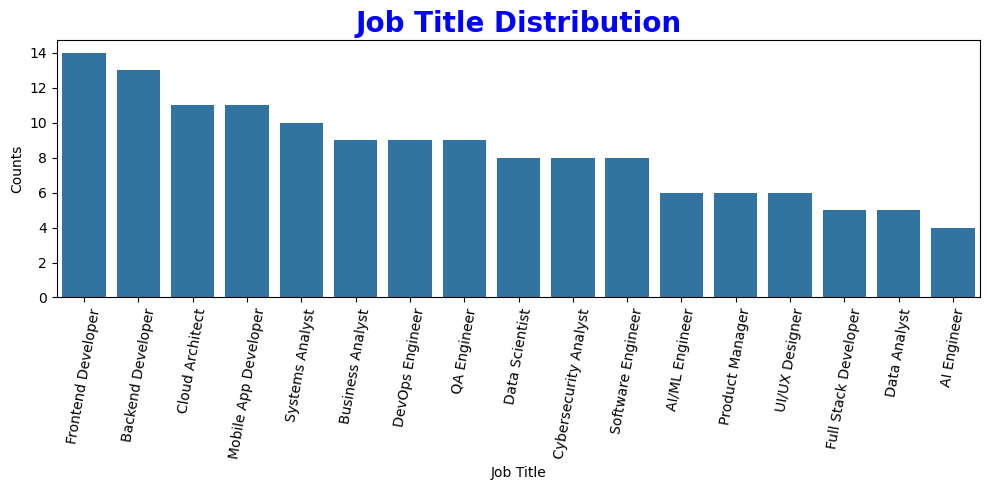

In [467]:
#Count Chart for Job Title
#Mesleklerdeki çalışan sayısını verir.

countXChartDraw(df, "Job Title", None, "Job Title Distribution", (10, 5))

In [468]:
#a method for drawing a histogram chart
def histogramXChartDraw(df, labels, labelX, labelHue, titleOfChart, size):

    df = deleteRowOfMissingData(df, labels)

    df = getCountry(df, "Location")

    df =  df.sort_values(by = labelX)

    plt.figure(figsize = size)
    sns.histplot(data = df, x = labelX, hue = labelHue)
    plt.title(titleOfChart, fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
    plt.xlabel(labelX)
    plt.ylabel('Counts')
    plt.xticks(rotation = 90)
    plt.show()

In [469]:
#a method for drawing a histogram chart
def histogramYChartDraw(df, labels, labelY, labelHue, titleOfChart, size):

    df = deleteRowOfMissingData(df, labels)

    df = getCountry(df, "Location")

    df =  df.sort_values(by = labelY)


    plt.figure(figsize = size)
    sns.histplot(data = df, y = labelY, hue = labelHue)
    plt.title(titleOfChart, fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
    plt.xlabel('Counts')
    plt.ylabel(labelY)
    plt.xticks(rotation = 90)
    plt.show()

##HISTOGRAM CHART FOR JOB TITLE AND LOCATION

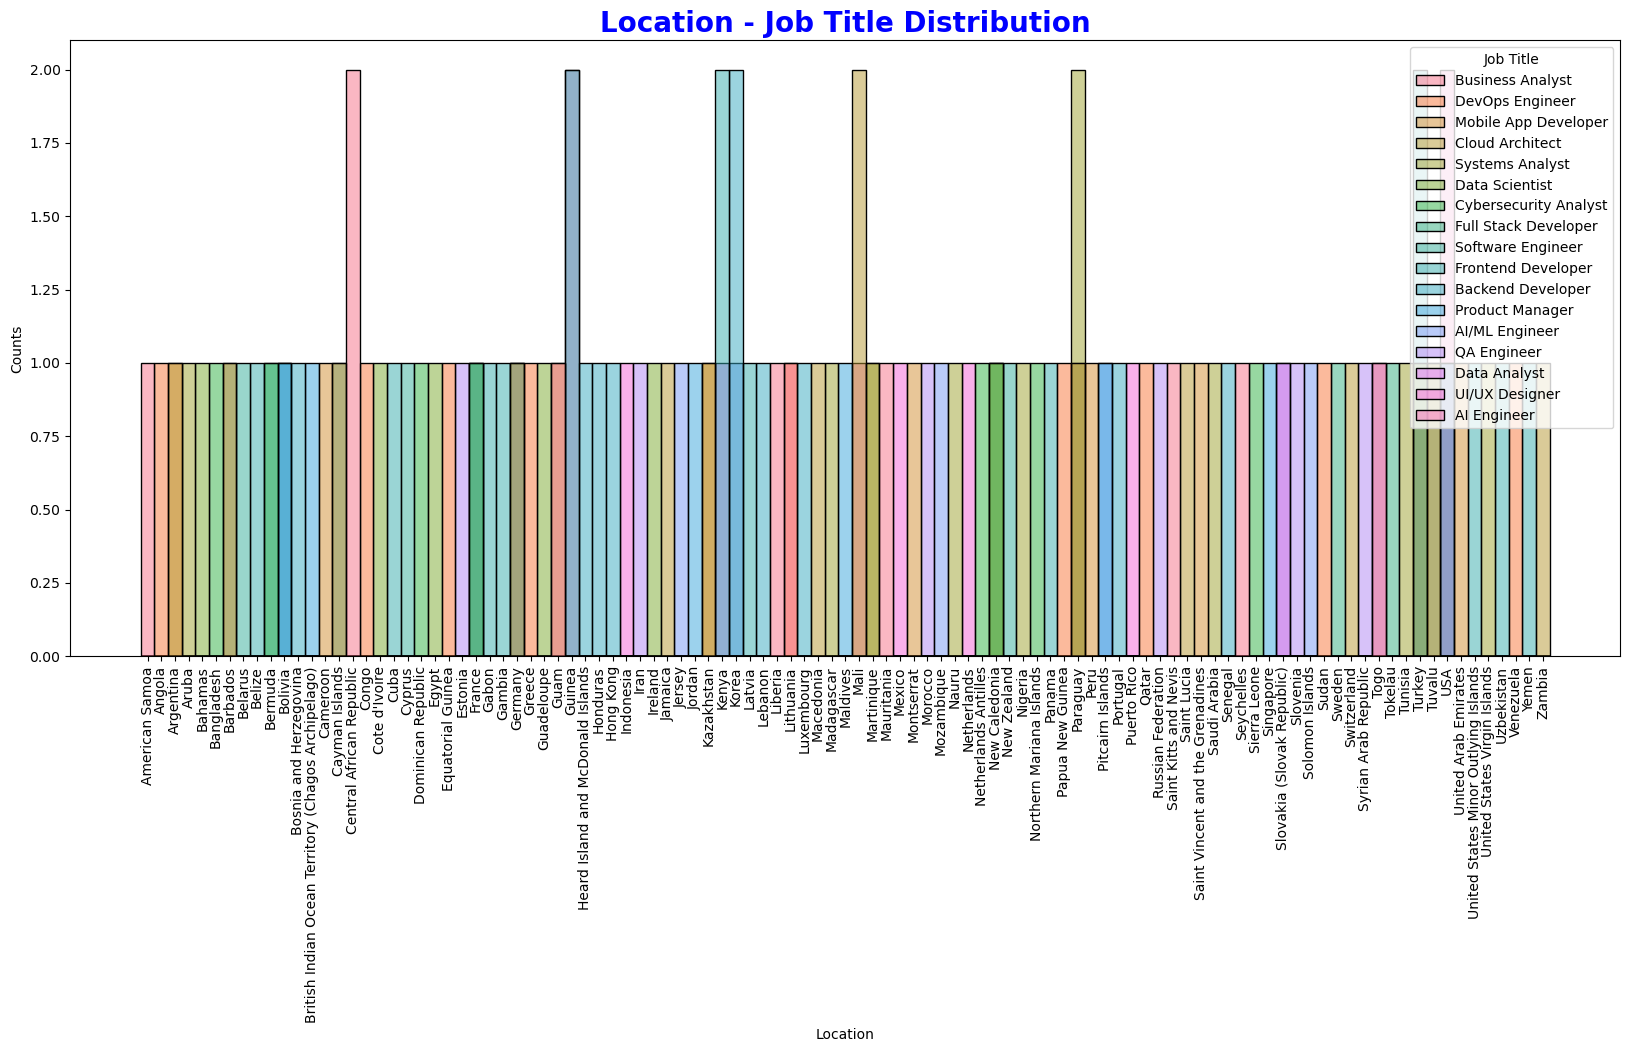

In [470]:
#Histogram Chart for Job Title and Location
#Ülkelerdeki mesleklerin dağılımını verir

histogramXChartDraw(df, ['Job Title', 'Location'], 'Location', 'Job Title', 'Location - Job Title Distribution', (20, 8))

##PIE CHART FOR EMPLOYMENT MODE

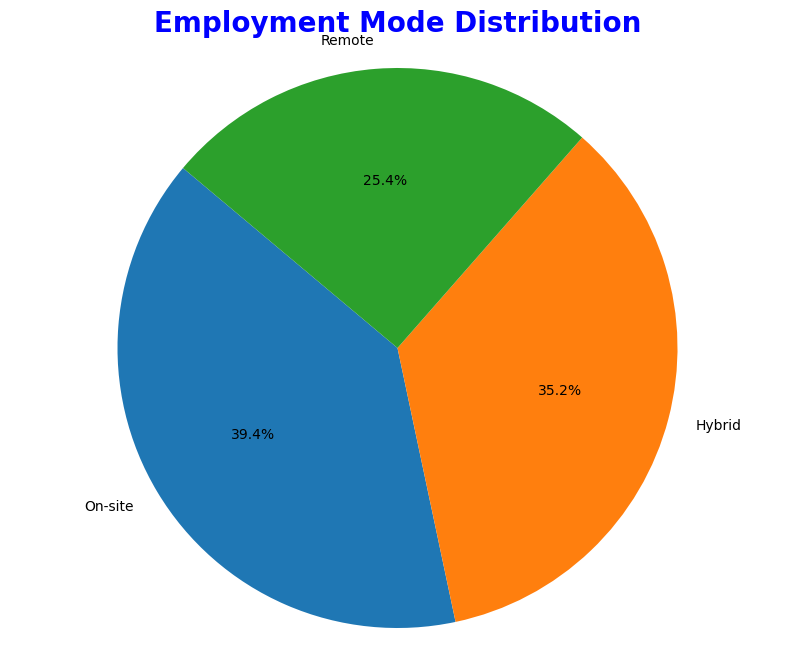

In [471]:
##pie chart for Employment Mode
#Çalışma modların tüm veri setindeki oranını görsel olarak temsil eder.
#Bu grafikler, çalışma modlarının göreceli boyutlarını hızlı bir şekilde anlamamıza yardımcı olabilir.

pieChartDraw(df, "Employment Mode", "Employment Mode Distribution", (10, 8))

##COUNT CHART FOR JOB TITLE AND EMPLOYMENT MODE

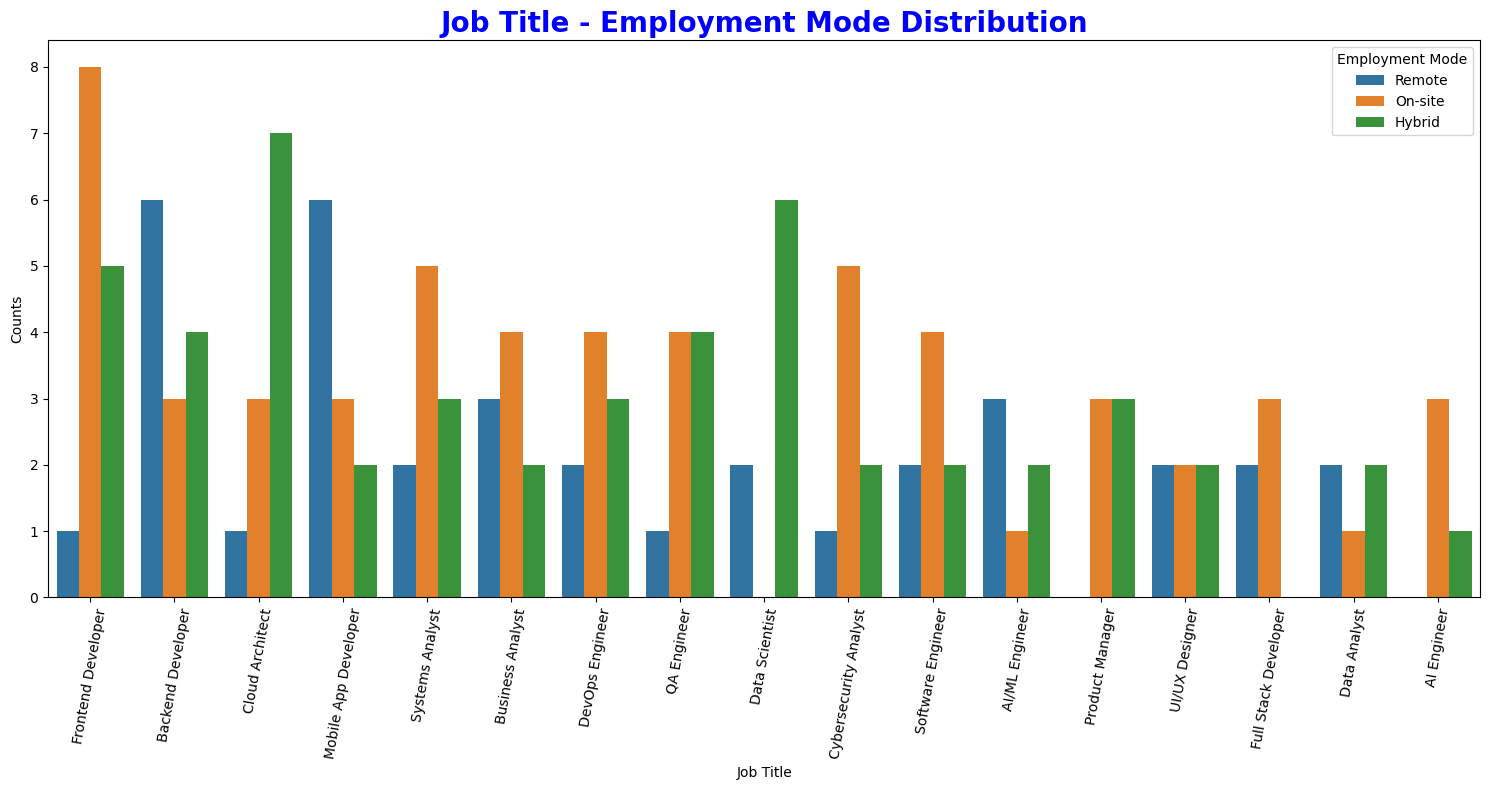

In [472]:
#Count Chart for Job Title and Employment Mode
#Mesleklerin çalışma moduna göre dağılımı verir

countXChartDraw(df, 'Job Title','Employment Mode', 'Job Title - Employment Mode Distribution', (15, 8))

##HISTOGRAM CHART FOR LOCATION AND EMPLOYMENT MODE

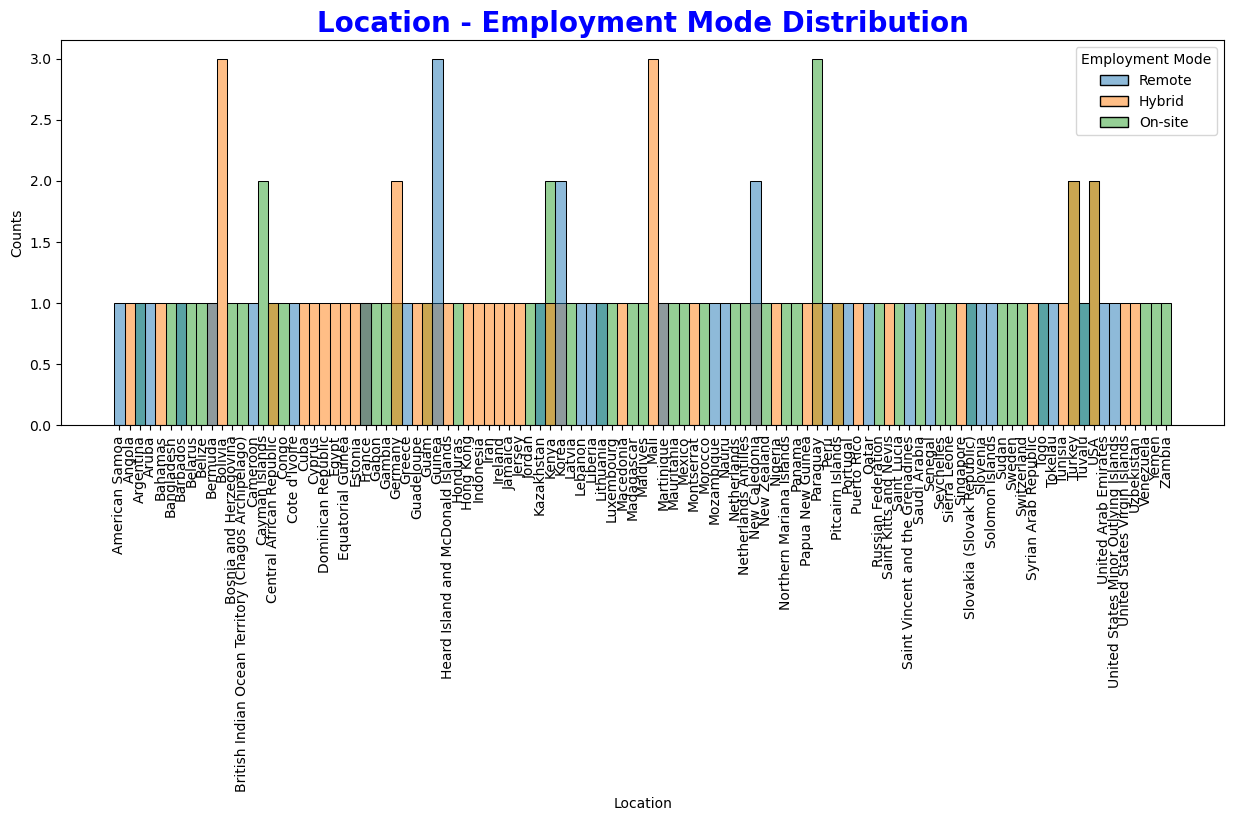

In [473]:
#Histogram Chart for Location and Employment Mode
#Konumlara göre çalışma modunun dağılımını verir.

histogramXChartDraw(df, ['Location', 'Employment Mode'], 'Location', 'Employment Mode', 'Location - Employment Mode Distribution', (15, 5))

In [474]:
#a method for drawing a wordCloud chart
def wordCloudChartDraw(df, label, titleOfChart, size):

    all_skills = df[label].str.split(', ').sum()

    wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(' '.join(all_skills))
    
    plt.figure(figsize = size)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(titleOfChart, fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
    plt.tight_layout()
    plt.show()

##WORDCLOUD CHART OF SKILLS REQUIRED

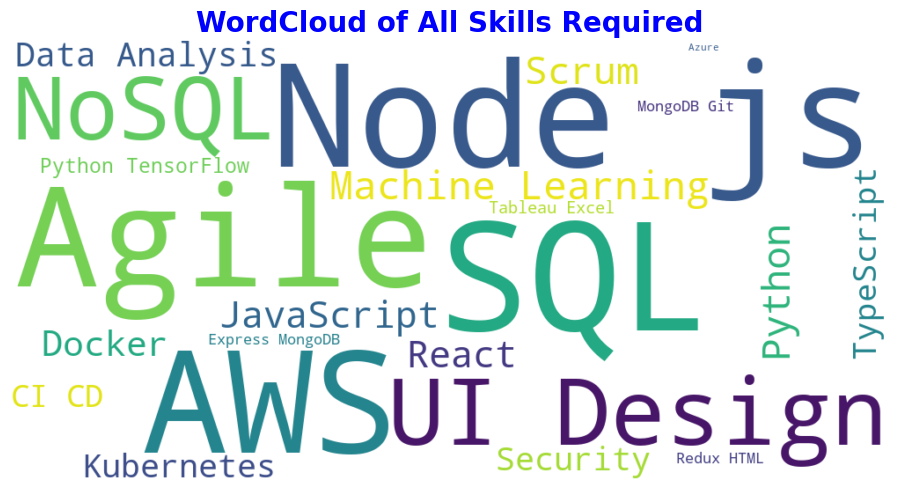

In [475]:
#WordCloud for Skills Required
#İş Gereksinimlerindeki kelimelerin frekans ve önemine görselleştirmek için.
#Daha sık ve daha önemli olanlar daha büyük fontla gösterilmekte.

wordCloudChartDraw(df, "Skills Required" , "WordCloud of All Skills Required", (10, 5))

In [476]:
#WordCloud kütüphanesi hatası için ilk önce aşağıdaki kodu çalıştırdım.
#import sys
#print(sys.executable)

#Sonrasında terminalde alttaki kod satırını açıltırdım.Sorun çözüldü
#c:/Users/asus/anaconda3/python -m pip install wordcloud 

In [477]:
def getSalary(df, label):
    if(label == "Salary Range"):
        for index in df['Salary Range'].index:
                df.loc[index, 'Salary Range'] = ((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])
                #print(((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])) 

        df =  df.sort_values(by = ('Salary Range'))
    return df

In [478]:
#a method for drawing a scatter chart
def scatterChartDraw(df, labels, labelX, labelY, labelHue, titleOfChart, size):

    df = deleteRowOfMissingData(df, labels)

    df = getSalary(df, labelX)

    plt.figure(figsize = size)
    sns.scatterplot(data = df, y = labelY, x = labelX, hue = labelHue, s = 170)
    plt.title(titleOfChart, fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
    plt.show()

##SCATTER CHART FOR JOB TITLE - SALARY - EXPERIENCE LEVEL

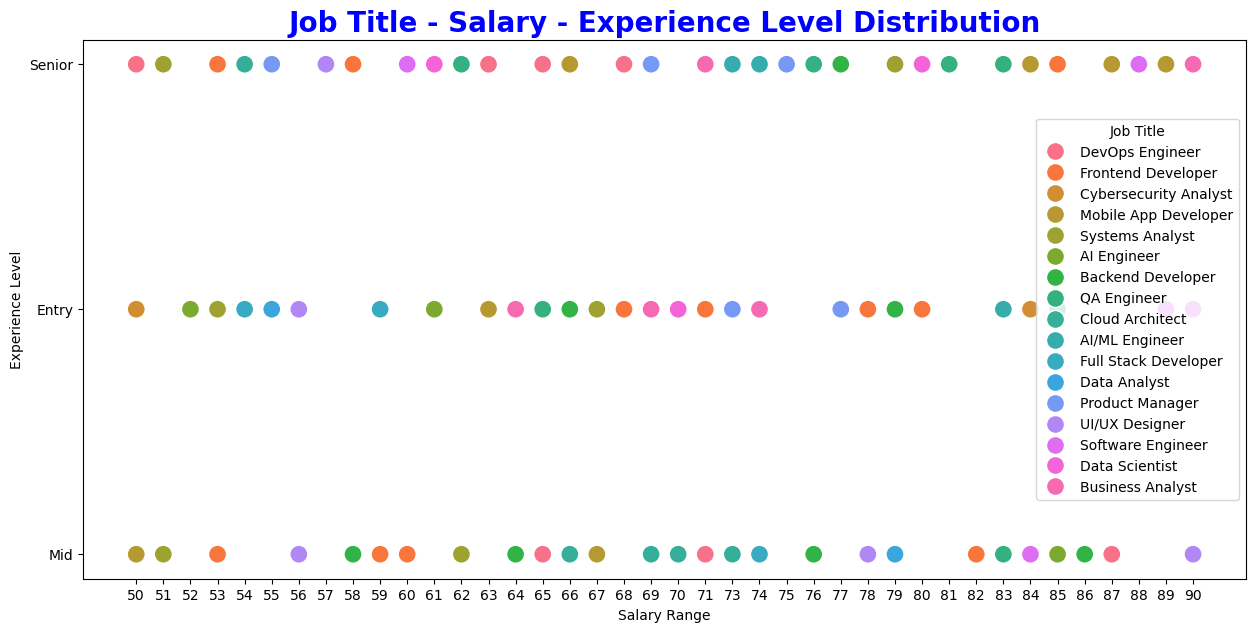

In [479]:
#Scatter Chart for Job Title - Salary - Experience Level
#Mesleklerin tecrübeye bağlı olarak maaşların dağılımını gösterir.

scatterChartDraw(df, ['Job Title', 'Salary Range', 'Experience Level'], 'Salary Range', 'Experience Level', 'Job Title',
                  'Job Title - Salary - Experience Level Distribution', (15, 7))

##SCATTER CHART FOR JOB TITLE - SALARY - EMPLOYMENT MODE

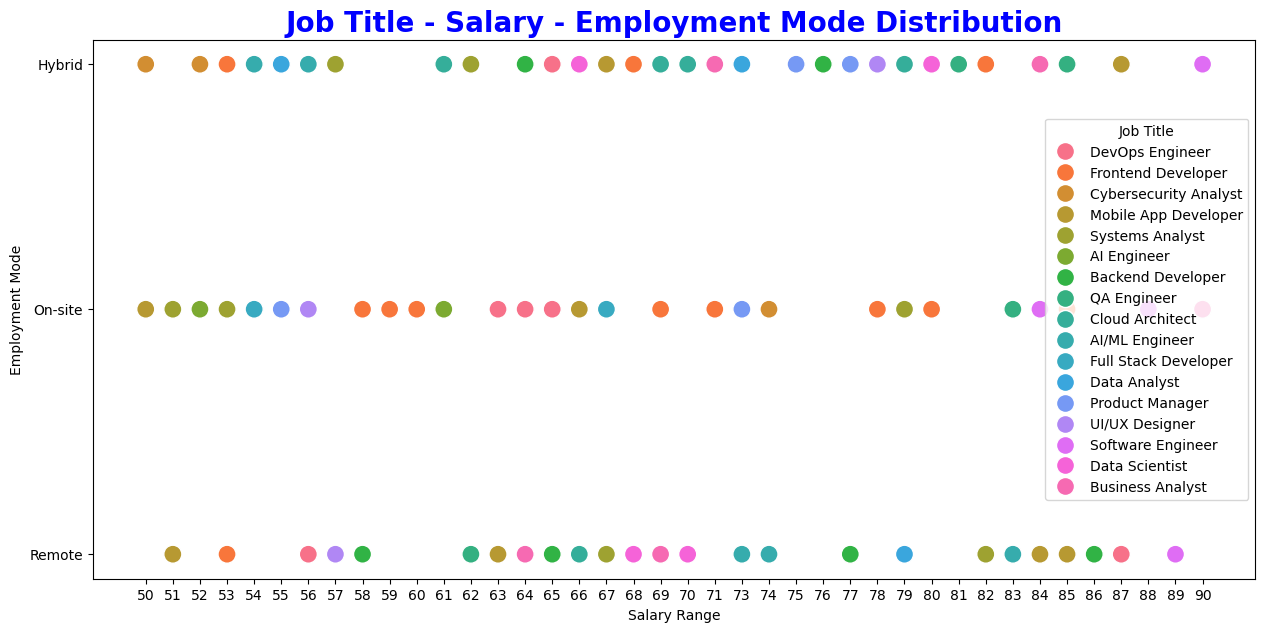

In [480]:
#Scatter Chart for Job Title - Salary - Employment Mode
#Mesleklerin çalışma moduna bağlı olarak maaşların dağılımını gösterir.

scatterChartDraw(df, ['Job Title', 'Salary Range', 'Employment Mode'], 'Salary Range', 'Employment Mode', 'Job Title', 
                 'Job Title - Salary - Employment Mode Distribution', (15, 7))

##SCATTER CHART FOR JOB TITLE - SALARY - JOB TYPE

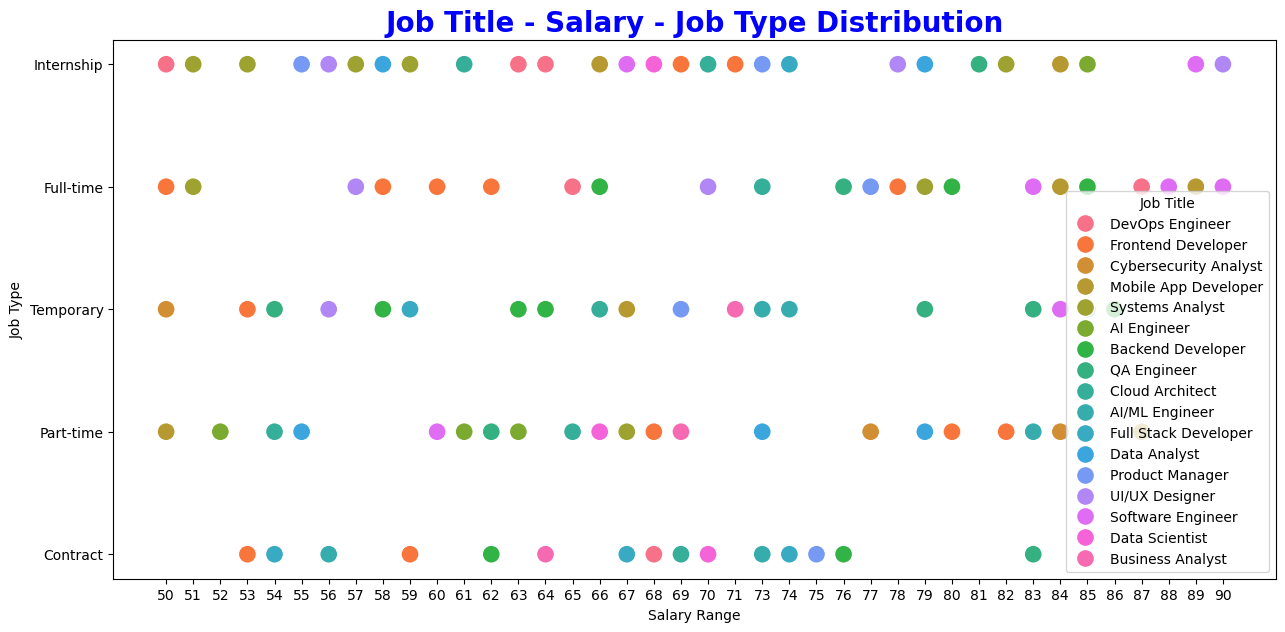

In [481]:
#Scatter Chart for Job Title - Salary - Job Type
#Mesleklerin iş türüne bağlı olarak maaşların dağılımını gösterir.

scatterChartDraw(df, ['Job Title', 'Salary Range', 'Job Type'], 'Salary Range', 'Job Type', 'Job Title', 'Job Title - Salary - Job Type Distribution', (15, 7))